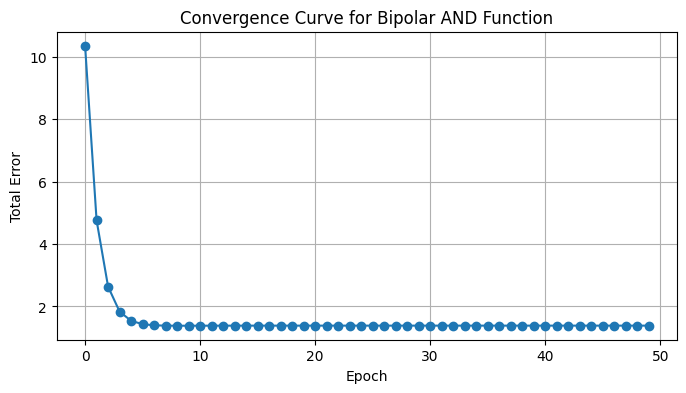

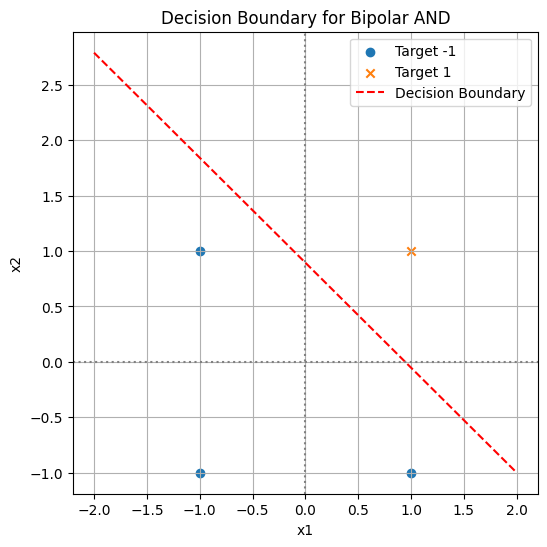

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define bipolar inputs and targets for AND logic
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
T = np.array([[-1], [-1], [-1], [1]])

# Add bias term (always 1)
X_bias = np.hstack((X, np.ones((X.shape[0], 1))))

# Initialize weights randomly
np.random.seed(1)
W = np.random.randn(3, 1)

# Hyperparameters
learning_rate = 0.1
epochs = 50
errors = []

# Training loop using perceptron learning rule
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X_bias)):
        y_pred = np.dot(X_bias[i], W)
        error = T[i] - y_pred
        W += learning_rate * error * X_bias[i].reshape(-1, 1)
        total_error += (error**2).item()
    errors.append(total_error)


# Plot convergence curve
plt.figure(figsize=(8, 4))
plt.plot(errors, marker='o')
plt.title("Convergence Curve for Bipolar AND Function")
plt.xlabel("Epoch")
plt.ylabel("Total Error")
plt.grid(True)
plt.show()

# Plot decision boundary
plt.figure(figsize=(6, 6))
for label, marker in zip([-1, 1], ['o', 'x']):
    plt.scatter(X[T.flatten() == label][:, 0], X[T.flatten() == label][:, 1],
                label=f'Target {label}', marker=marker)

x_vals = np.linspace(-2, 2, 100)
y_vals = -(W[0] * x_vals + W[2]) / W[1]
plt.plot(x_vals, y_vals, 'r--', label='Decision Boundary')
plt.title("Decision Boundary for Bipolar AND")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axhline(0, color='gray', linestyle=':')
plt.axvline(0, color='gray', linestyle=':')
plt.legend()
plt.grid(True)
plt.show()
